**EDA ON SUICIDE RATE BY COUNTRY**

Suicide occurs throughout the world, affecting individuals of all nations, cultures, religions, genders, and classes. Other innate factors, such as disorders of the mind and abnormalities at birth, can heighten someone's propensity for experiencing depression, whether as the occasional episode or a lifelong ailment.

Importing all the required libraries.

In [1]:
import  pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset.

In [3]:
df= pd.read_csv('/content/data.csv')

Preview only 5 rows of the Dataframe

In [4]:
df.head()

,place,pop2022,growthRate,area,country,cca3,cca2,ccn3,region,subregion,...,density,densityMi,Rank,rate2019male,rate2019female,rate2019both,rate2015male,rate2015female,rate2015both,rank
426,2305825.0,0.01068,30355,Lesotho,LSO,LS,426,Africa,Southern Africa,Sub-Saharan Africa,...,75.9494,196.7090,147.0,116.0,30.1,72.4,147,39,92,1.0
328,808726.0,0.00517,214969,Guyana,GUY,GY,328,South America,South America,Latin America,...,4.1083,10.6406,164.0,63.0,17.4,40.3,58,16,37,2.0
748,1201670.0,0.00788,17364,Eswatini,SWZ,SZ,748,Africa,Southern Africa,Sub-Saharan Africa,...,69.8645,180.9491,159.0,55.1,4.7,29.4,62,9,35,3.0
410,51815810.0,-0.00028,100210,South Korea,KOR,KR,410,Asia,Eastern Asia,97600,...,1375.0302,29.0000,40.2,16.9,28.6,39.0,16,28,4,NaN
296,131232.0,0.01830,811,Kiribati,KIR,KI,296,Oceania,Micronesia,810,...,419.6184,192.0000,48.6,8.7,28.3,50.0,9,29,5,NaN


Listing all the columns of the dataframe

In [5]:
df.columns

Index(['place', 'pop2022', 'growthRate', 'area', 'country', 'cca3', 'cca2',
       'ccn3', 'region', 'subregion', 'landAreaKm', 'density', 'densityMi',
       'Rank', 'rate2019male', 'rate2019female', 'rate2019both',
       'rate2015male', 'rate2015female', 'rate2015both', 'rank'],
      dtype='object')

Print the shape of the dataframe 

In [6]:
df.shape

(179, 21)

**Observation**

It states that the dataset contains 179 Rows and 21 Columns.



**Variable Transformation**

Write the code to check for unwanted symbol in each columns 

In [7]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("\n\n")

place
2305825.0     1
782455.0      1
33696614.0    1
2695122.0     1
33938221.0    1
             ..
1120849.0     1
1299469.0     1
26069416.0    1
2093599.0     1
93763.0       1
Name: place, Length: 179, dtype: int64



pop2022
 0.00639    2
 0.03044    1
 0.01337    1
 0.02168    1
 0.00256    1
           ..
 0.01383    1
 0.00043    1
 0.00375    1
-0.00463    1
 0.00584    1
Name: pop2022, Length: 178, dtype: int64



growthRate
30355     1
38394     1
527968    1
11586     1
330803    1
         ..
23200     1
2040      1
120538    1
25713     1
442       1
Name: growthRate, Length: 179, dtype: int64



area
Lesotho                1
Bhutan                 1
Yemen                  1
Qatar                  1
Malaysia               1
                      ..
Djibouti               1
Mauritius              1
North Korea            1
North Macedonia        1
Antigua and Barbuda    1
Name: area, Length: 179, dtype: int64



country
LSO    1
BTN    1
YEM    1
QAT    1
MYS    1
      

Check the Datatype of each columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 426 to 28
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   place           179 non-null    float64
 1   pop2022         179 non-null    float64
 2   growthRate      179 non-null    int64  
 3   area            179 non-null    object 
 4   country         179 non-null    object 
 5   cca3            178 non-null    object 
 6   cca2            179 non-null    int64  
 7   ccn3            179 non-null    object 
 8   region          179 non-null    object 
 9   subregion       179 non-null    object 
 10  landAreaKm      179 non-null    float64
 11  density         179 non-null    float64
 12  densityMi       179 non-null    float64
 13  Rank            179 non-null    float64
 14  rate2019male    179 non-null    float64
 15  rate2019female  179 non-null    float64
 16  rate2019both    179 non-null    float64
 17  rate2015male    179 non-null    in

**Observation**

Dtat type of each column is clearly mention in front of every column

Convert the datatypes using **astype**

In [9]:
df['density']=df['density'].astype('float')
df['place']=df['place'].astype('float')
df['rank']=df['rank'].astype('float')

**Missing Values**

Code for checking the missing values

In [10]:
df.isnull().sum()

place              0
pop2022            0
growthRate         0
area               0
country            0
cca3               1
cca2               0
ccn3               0
region             0
subregion          0
landAreaKm         0
density            0
densityMi          0
Rank               0
rate2019male       0
rate2019female     0
rate2019both       0
rate2015male       0
rate2015female     0
rate2015both       0
rank              86
dtype: int64

**Observation**

The code clearly gives the output that cca3 column has 1 missing value

Filling the missing values using mode

In [11]:
for i in ['cca3','rank']:
    df[i] = df[i].fillna(df[i].mode()[0])


Let's again check for the missing values

In [12]:
df.isnull().sum()

place             0
pop2022           0
growthRate        0
area              0
country           0
cca3              0
cca2              0
ccn3              0
region            0
subregion         0
landAreaKm        0
density           0
densityMi         0
Rank              0
rate2019male      0
rate2019female    0
rate2019both      0
rate2015male      0
rate2015female    0
rate2015both      0
rank              0
dtype: int64

**Observation**

Now there are no missing values in the dataset

If there are any duplicate value in the dataset, write the code to drop them

In [ ]:
df.drop_duplicates(inplace=True,ignore_index=True)

**Analyzing the data**

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
place,179.0,4.406868e+07,1.550831e+08,93763.00000,2.728024e+06,1.014262e+07,3.381742e+07,1.425887e+09
pop2022,179.0,1.097637e-02,1.401889e-02,-0.08798,3.835000e-03,1.029000e-02,1.935000e-02,6.908000e-02
growthRate,179.0,7.420734e+05,1.981464e+06,300.00000,3.004900e+04,1.475700e+05,5.845205e+05,1.709824e+07
cca2,179.0,4.322235e+02,2.552244e+02,4.00000,2.160000e+02,4.260000e+02,6.540000e+02,8.940000e+02
landAreaKm,179.0,3.050609e+05,7.921087e+05,2.18190,1.014134e+02,1.861000e+03,2.530150e+05,8.358140e+06
density,179.0,3.968482e+02,1.653404e+03,3.11800,5.013485e+01,1.271017e+02,3.057505e+02,2.155576e+04
densityMi,179.0,2.756960e+02,5.976354e+02,1.00000,6.500000e+01,1.310000e+02,1.953545e+02,4.857431e+03
Rank,179.0,5.301899e+01,5.193903e+01,0.00000,1.415000e+01,2.900000e+01,7.900000e+01,1.960000e+02
rate2019male,179.0,9.064804e+00,1.137686e+01,0.30000,4.000000e+00,7.000000e+00,9.800000e+00,1.160000e+02
rate2019female,179.0,7.119553e+00,6.475547e+00,0.40000,2.700000e+00,4.100000e+00,1.095000e+01,3.010000e+01


**Observation**

The above output shows all the statistial value of the given dataset

**Univariate Analysis**

In [19]:
df['growthRate'].value_counts()

30355     1
38394     1
527968    1
11586     1
330803    1
         ..
23200     1
2040      1
120538    1
25713     1
442       1
Name: growthRate, Length: 179, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


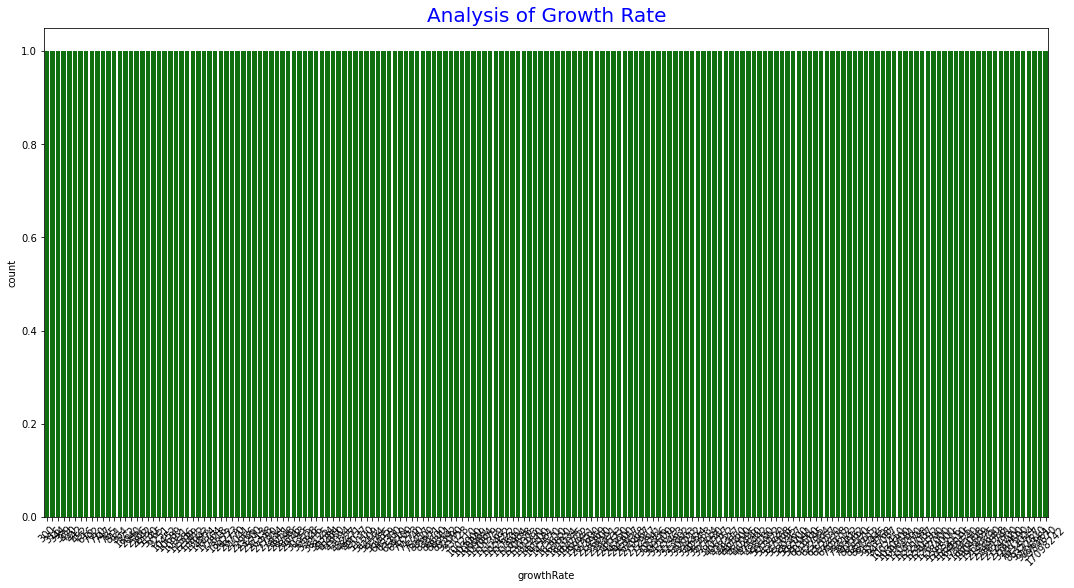

In [26]:
plt.figure(figsize=(18,9))
plt.xticks(rotation = 45)
plt.title(f"Analysis of Growth Rate" , fontsize=20,color="Blue")
sns.countplot(df['growthRate'], color='green')

Group by newly generated column aggregated on mean

In [27]:
df.groupby(['growthRate'])['place'].agg('mean')

growthRate
300         5.237870e+05
316         5.332860e+05
344         1.254380e+05
389         1.039480e+05
430         2.816350e+05
                ...     
8515767     2.153135e+08
9372610     3.382899e+08
9706961     1.425887e+09
9984670     3.845433e+07
17098242    1.447133e+08
Name: place, Length: 179, dtype: float64

**Observation**

The above output shows the grouped data of growth rate with place

In [28]:
max(df.groupby(['growthRate'])['place'].agg('mean'))

1425887337.0

**Observation** 

Maximum of the group by column is 1425887337.0

**Univariate Analysis on each column**

Analysis on place


In [29]:
df['place'].value_counts()

2305825.0     1
782455.0      1
33696614.0    1
2695122.0     1
33938221.0    1
             ..
1120849.0     1
1299469.0     1
26069416.0    1
2093599.0     1
93763.0       1
Name: place, Length: 179, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Analysis of region')

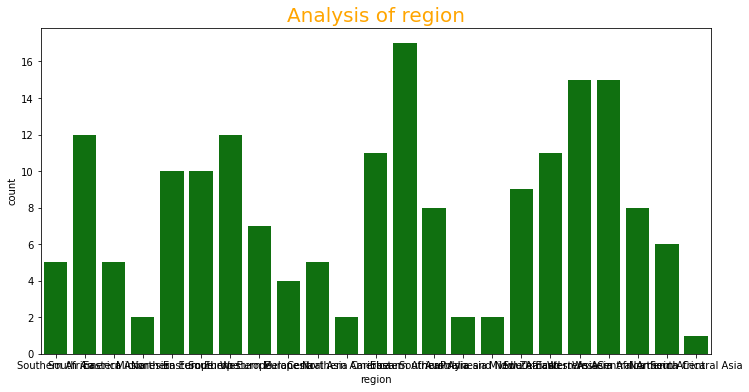

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(df.region,color='green')
plt.title(f"Analysis of region" , fontsize=20,
          color="orange")

**Observation**

The region belongs to highest bar in the chart has the maximum count rate

List all the data where region is Central Asia

In [42]:
df[df['region']=='Central Asia']

,place,pop2022,growthRate,area,country,cca3,cca2,ccn3,region,subregion,...,density,densityMi,Rank,rate2019male,rate2019female,rate2019both,rate2015male,rate2015female,rate2015both,rank
398,19397998.0,0.01050,2724900,Kazakhstan,KAZ,KZ,398,Asia,Central Asia,2699700,...,18.6098,66.0000,29.0,6.8,17.6,39.0,8,23,20,1.0
860,34627652.0,0.01603,447400,Uzbekistan,UZB,UZ,860,Asia,Central Asia,South Central Asia,...,78.5831,203.5303,43.0,11.3,4.8,8.0,12,5,9,82.0
417,6630623.0,0.01576,199951,Kyrgyzstan,KGZ,KG,417,Asia,Central Asia,South Central Asia,...,34.5705,89.5376,110.0,11.7,3.2,7.4,16,3,9,92.0
795,6430770.0,0.01402,488100,Turkmenistan,TKM,TM,795,Asia,Central Asia,South Central Asia,...,13.6845,35.4429,111.0,8.8,2.7,5.7,9,3,6,118.0
762,9952787.0,0.02079,143100,Tajikistan,TJK,TJ,762,Asia,Central Asia,South Central Asia,...,71.7111,185.7318,95.0,5.7,2.8,4.3,5,2,4,140.0


**Observation**

All the above mentioned data shows us the first five data where the region belongs to Central Asia.

**Analysis of Place**

Plot the box plot for the analysis of place.

Skewness is : 8.045031935271206


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Analysis of Place - Box Plot')

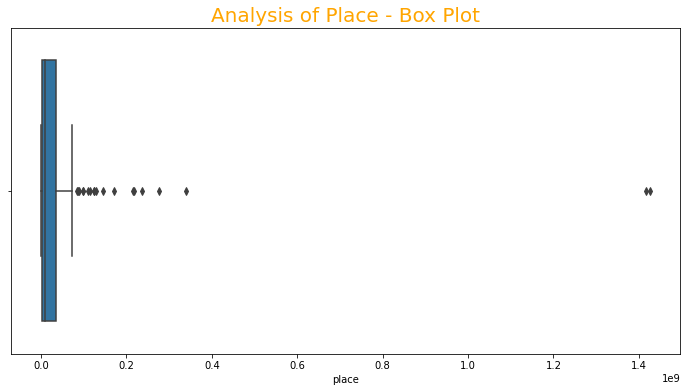

In [45]:
plt.figure(figsize=(12,6))
print("Skewness is :",df.place.skew())
sns.boxplot(df.place)
df.place.describe()
plt.title(f"Analysis of Place - Box Plot" , fontsize=20,
          color="orange")

**Observation**

Data is skewed as visible from the plot

Plot the count plot for the analysis of pop 2022

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Analysis of Pop 2022')

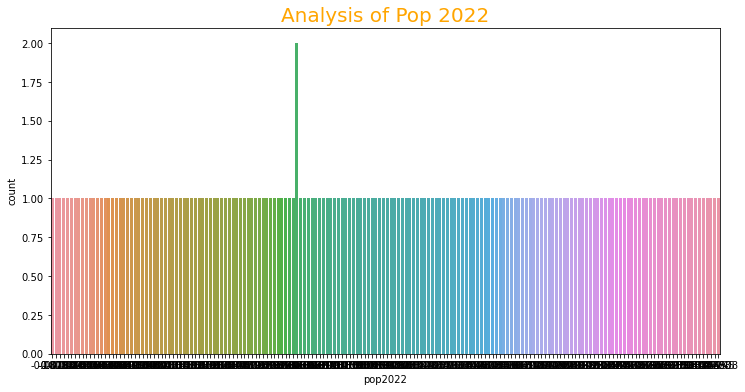

In [49]:
plt.figure(figsize=(12,6))
sns.countplot('pop2022',data=df)
plt.title(f"Analysis of Pop 2022" , fontsize=20,
          color="orange")

**Observation**

The plot for the analysis of column pop2022 is clearly visible, and the green bar shows the maximum value of pop2022

Check for the skewness of the place column using distplot and also print the skewness of the column

Skewness is : 8.045031935271206


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Analysis of place - skewness')

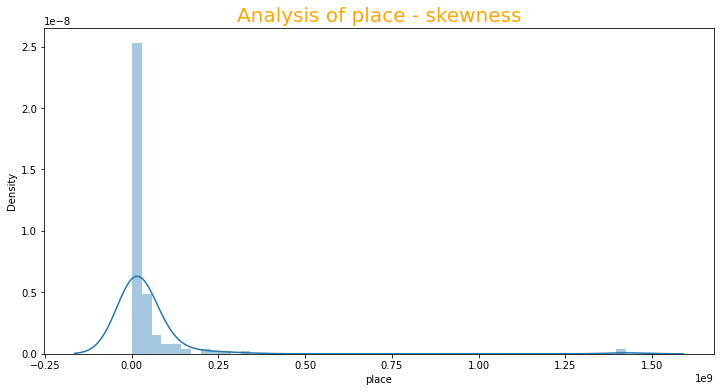

In [50]:
print("Skewness is :", df.place.skew())
plt.figure(figsize=(12,6))
sns.distplot(df.place)
df.place.describe()
plt.title(f"Analysis of place - skewness" , fontsize=20,
          color="orange")

**Observation**

The skewed graph is shown in the above plot

Check for the skewness of the pop2022 column using distplot and also print the skewness of the column

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Analysis of pop2022 - skewness')

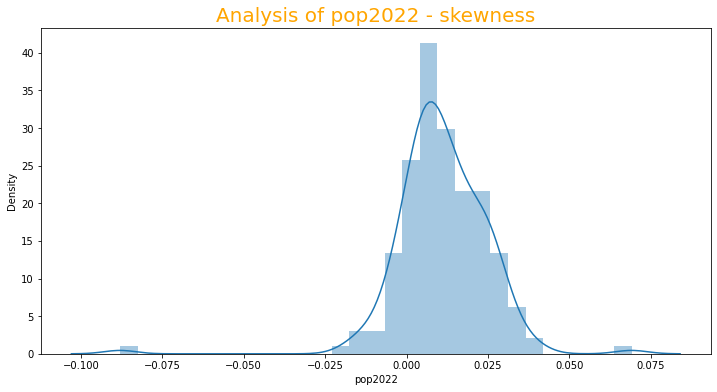

In [51]:
plt.figure(figsize=(12,6))
sns.distplot(df.pop2022)
plt.title(f"Analysis of pop2022 - skewness", fontsize= 20, color = "orange")

**Observation**

The skewed graph is shown for pop2022 column

Plot the count plot of the column ccn3 for Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Analysis of ccn3')

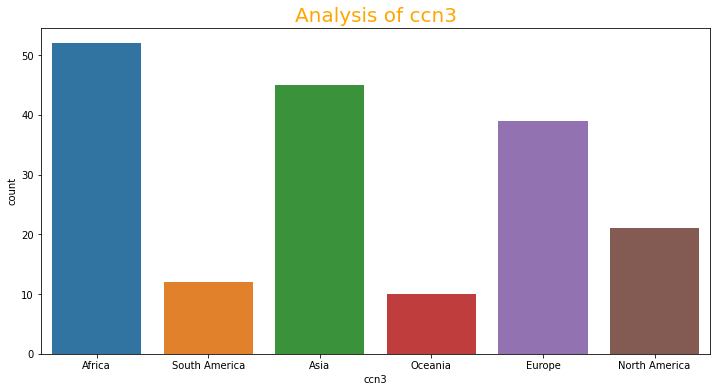

In [54]:
plt.figure(figsize=(12,6))
sns.countplot('ccn3',data=df)
df.ccn3.value_counts()
plt.title(f"Analysis of ccn3" , fontsize=20,
          color="orange")

**Observation**

The Blue bar for Africa shows the highest count for the column ccn3

**BIVARIATE ANALYSIS**

Pair plot using seaborn libraries

Text(0.5, 1.0, 'Pairplot')

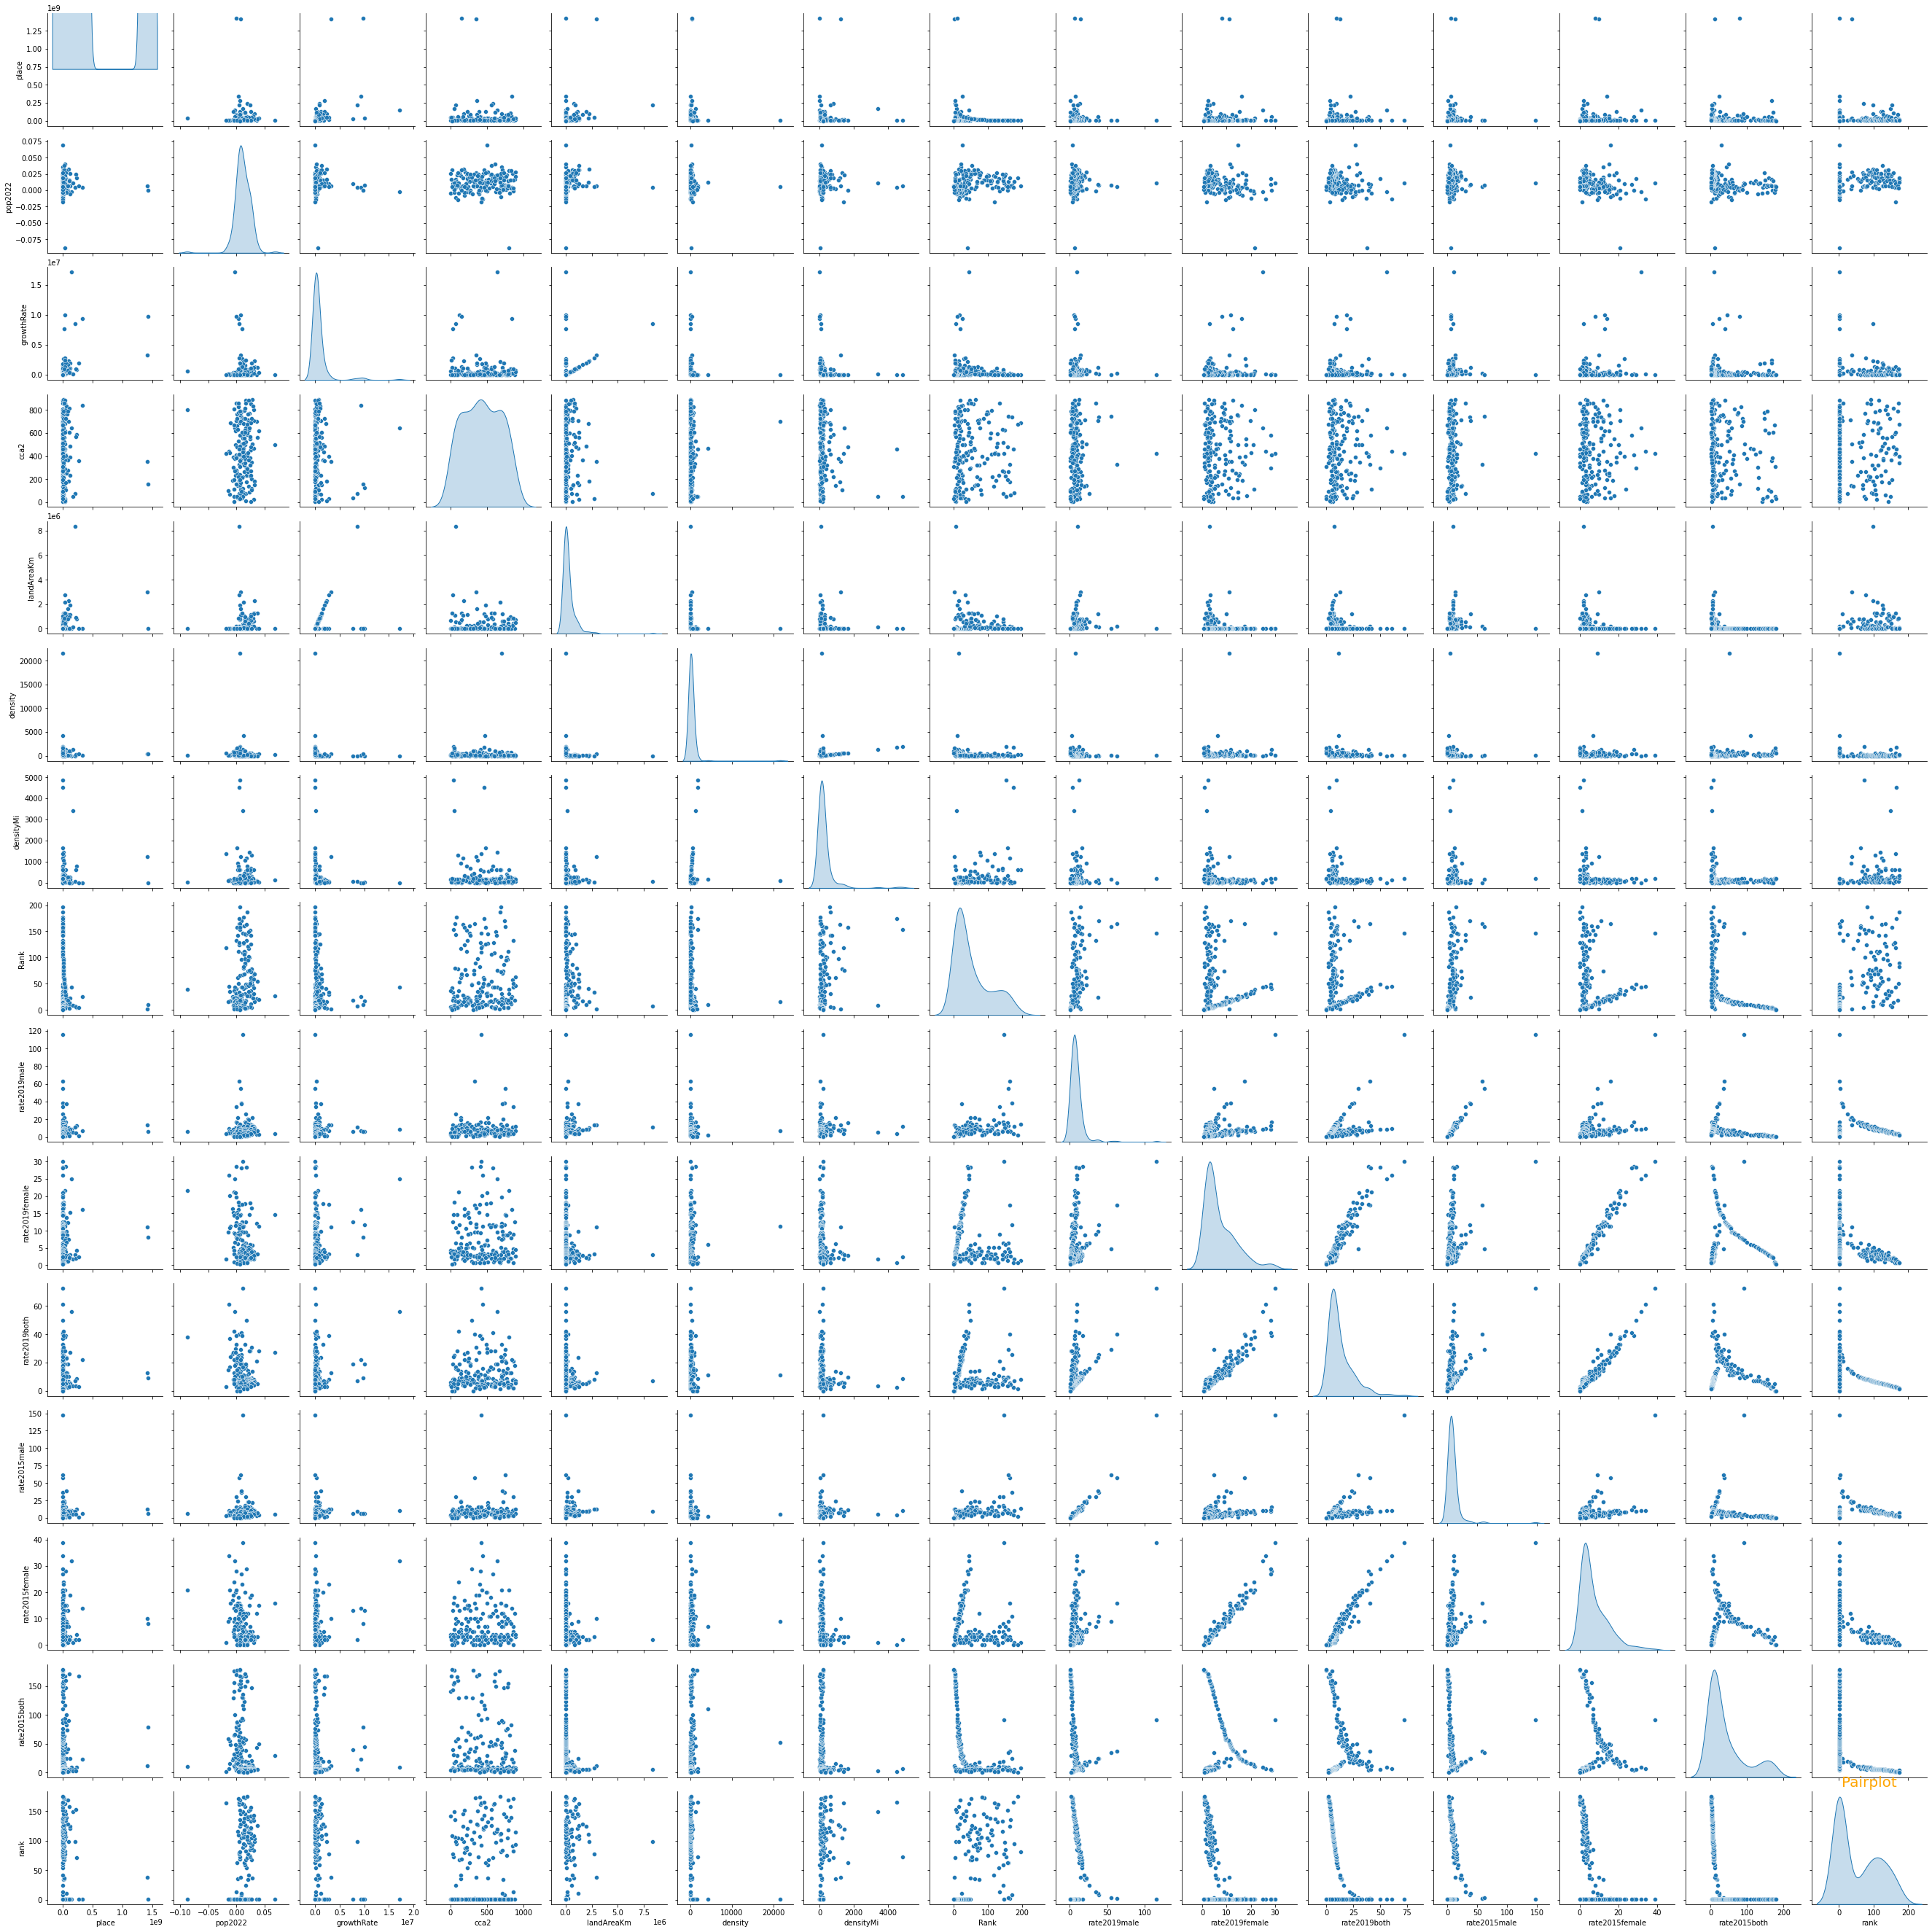

In [55]:
sns.pairplot(df, diag_kind = 'kde')
plt.title(f"Pairplot" , fontsize=20, color="orange")

**Observation**

The graphs using seaborn libray is plotted for every individual column. 

**place** The graphs for the place column are drawn, each ranging from 0.00 to 1.25. The content inside the graphs are shown by dots. 

**growthRate** The graphs for the growth rate is shown which ranges from 0 to 1.5. All the graphs are showing the data of the dataset

**cca2** The graphs for the cca2 is shown which ranges from 0 to 800. All the graphs are showing the data of the dataset in the related column. 

**landAreaKm**  The graphs for the land area km is shown which ranges from 0 to 8. All the graphs are showing the data of the dataset. 

**Density** The graphs for the density column are drawn, each ranging from 0 to 20,000. The content inside the graphs are shown by dots.

**densityMi** The graphs for the densityMi column are drawn, each ranging from 0 to 5000. The content inside the graphs are shown by dots.

**Rank** The graph related to this column is shown in the above plot, the data for this column ranges from 0 to 200 

**rate 2019 male** The graph related to this column shows the data for all the males in the year 2019, ranging from 0 to 120

**rate 2019 female** The graph related to this column shows the data for all the females in the year 2019, ranging from 0 to 30 

**rate 2019 both** The graph related to this column shows the data for all the males and females in the year 2019, ranfing from 0 to 60

**rate 2015 male** The graph related to this column shows the data for all the males in the year 2015, ranging from 0 to 150

**rate 2015 female** The graph related to this column shows the data for all the females in the year 2015, ranging from 0 to 40

**rate 2015 both** The graph related to this column shows the data for all the males and females in the year 2019, ranfing from 0 to 150

